In [13]:
import xarray as xr
import numpy as np
import importlib
import matplotlib.pyplot as plt
import shutil

# import local modules
if __name__ == '__main__' and __package__ is None:
    from os import sys, path
    sys.path.append(path.dirname(path.dirname(path.dirname(path.abspath("__file__")))))
import pytechsas.sensor.mgd77_driver as mgd77
import pytechsas.sensor.techsas_gravi_process as tg
from datetime import datetime

In [78]:
base_path = 'C://Users//gbillant//Desktop//test_gravi//Salsa-leg1-14000800//tests2//'
gravi_file = base_path + '201400080045-KSS-AT_KSS31M.gravi.nc'
mag_file = base_path + '201400080045-scalar_mag-AT_MAGSS.mag.nc'
depth_file = base_path + '201400080045-sb_depth-AT_EM122.depth.nc'

In [ ]:
importlib.reload(mgd77)
mgd77_ds = mgd77.create_mgd77_ds([gravi_file,mag_file,depth_file], period='60S')
mgd77_ds

In [14]:
importlib.reload(tg)
in_file = (
        "C:\\Users\\gbillant\\Desktop\\test_gravi\\Salsa-leg1-14000800\\tests\\201400080045-KSS-AT_KSS31M.gravi.nc"
    )
out_file = in_file.replace(".gravi.nc", "_processed.gravi.nc")
shutil.copy(in_file, out_file)
real = 7671
install = 8338
tg.proccess_gravi_file(
    gravi_file_path=out_file,
    ref_date_1=datetime(2014, 4, 2),
    ref_value_1=978150.487,
    ref_measure_1=-2978.594,
    ref_date_2=datetime(2014, 5, 4),
    ref_value_2=978311.012,
    ref_measure_2=-2807.100,
    real_spring_stiffness=real,
    install_spring_stiffness=install,
    filter_delay=0,
)
    

In [104]:
plt.rcParams['figure.dpi'] = 150
def compare_mgd77(file_1:str, file_2:str):
    with mgd77.read_mgd77(file_1) as ds1, mgd77.read_mgd77(file_2) as ds2: 
        for record in Mgd77Data :
            if record != Mgd77Data.DATE_TIME and record != Mgd77Data.BATHYMETRIC_CORRECTION_CODE:
                fig, axes = plt.subplots(ncols=3)
                if ds1[record.name].size is not 0 :
                    ds1[record.name].plot(ax=axes[0])
                    ds2[record.name].plot(ax=axes[1])
                    diff = ds1[record.name] - ds2[record.name]
                    print(record.name, " => ", diff.std())
                    (ds1[record.name] - ds2[record.name]).plot(ax=axes[2])

DATA_RECORD_TYPE  =>  <xarray.DataArray 'DATA_RECORD_TYPE' ()>
array(0.)
SURVEY_IDENTIFIER  =>  <xarray.DataArray 'SURVEY_IDENTIFIER' ()>
array(0.)
TIME_ZONE_CORRECTION  =>  <xarray.DataArray 'TIME_ZONE_CORRECTION' ()>
array(0.)
LATITUDE  =>  <xarray.DataArray 'LATITUDE' ()>
array(0.00176178)
LONGITUDE  =>  <xarray.DataArray 'LONGITUDE' ()>
array(0.00179522)
POSITION_TYPE_CODE  =>  <xarray.DataArray 'POSITION_TYPE_CODE' ()>
array(0.)


C:\dev\miniconda\envs\pyat_dev\lib\site-packages\numpy\lib\nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


BATHYMETRY_2_WAY_TRAVELTIME  =>  <xarray.DataArray 'BATHYMETRY_2_WAY_TRAVELTIME' ()>
array(nan)
BATHYMETRY_CORRECTED_DEPTH  =>  <xarray.DataArray 'BATHYMETRY_CORRECTED_DEPTH' ()>
array(12.23112005)
BATHYMETRIC_TYPE_CODE  =>  <xarray.DataArray 'BATHYMETRIC_TYPE_CODE' ()>
array(0.)
MAGNETICS_TOTAL_FIELD_1  =>  <xarray.DataArray 'MAGNETICS_TOTAL_FIELD_1' ()>
array(1.21141333)


C:\dev\miniconda\envs\pyat_dev\lib\site-packages\numpy\lib\nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
C:\dev\miniconda\envs\pyat_dev\lib\site-packages\numpy\lib\nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


MAGNETICS_TOTAL_FIELD_2  =>  <xarray.DataArray 'MAGNETICS_TOTAL_FIELD_2' ()>
array(nan)
MAGNETICS_RESIDUAL_FIELD  =>  <xarray.DataArray 'MAGNETICS_RESIDUAL_FIELD' ()>
array(nan)
SENSOR_FOR_RESIDUAL_FIELD  =>  <xarray.DataArray 'SENSOR_FOR_RESIDUAL_FIELD' ()>
array(0.)
MAGNETICS_DIURNAL_CORRECTION  =>  <xarray.DataArray 'MAGNETICS_DIURNAL_CORRECTION' ()>
array(nan)


C:\dev\miniconda\envs\pyat_dev\lib\site-packages\numpy\lib\nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
C:\dev\miniconda\envs\pyat_dev\lib\site-packages\numpy\lib\nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


DEPTH_OR_ALTITUDE_OF_MAGNETICS_SENSOR  =>  <xarray.DataArray 'DEPTH_OR_ALTITUDE_OF_MAGNETICS_SENSOR' ()>
array(nan)
OBSERVED_GRAVITY  =>  <xarray.DataArray 'OBSERVED_GRAVITY' ()>
array(1.12188711)
EOTVOS_CORRECTION  =>  <xarray.DataArray 'EOTVOS_CORRECTION' ()>
array(0.40238087)
FREE_AIR_ANOMALY  =>  <xarray.DataArray 'FREE_AIR_ANOMALY' ()>
array(1.10820143)


C:\dev\miniconda\envs\pyat_dev\lib\site-packages\numpy\lib\nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
C:\dev\miniconda\envs\pyat_dev\lib\site-packages\numpy\lib\nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
C:\dev\miniconda\envs\pyat_dev\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


SEISMIC_LINE_NUMBER  =>  <xarray.DataArray 'SEISMIC_LINE_NUMBER' ()>
array(nan)
SEISMIC_SHOT_POINT_NUMBER  =>  <xarray.DataArray 'SEISMIC_SHOT_POINT_NUMBER' ()>
array(nan)
QUALITY_CODE_FOR_NAVIGATION  =>  <xarray.DataArray 'QUALITY_CODE_FOR_NAVIGATION' ()>
array(0.)


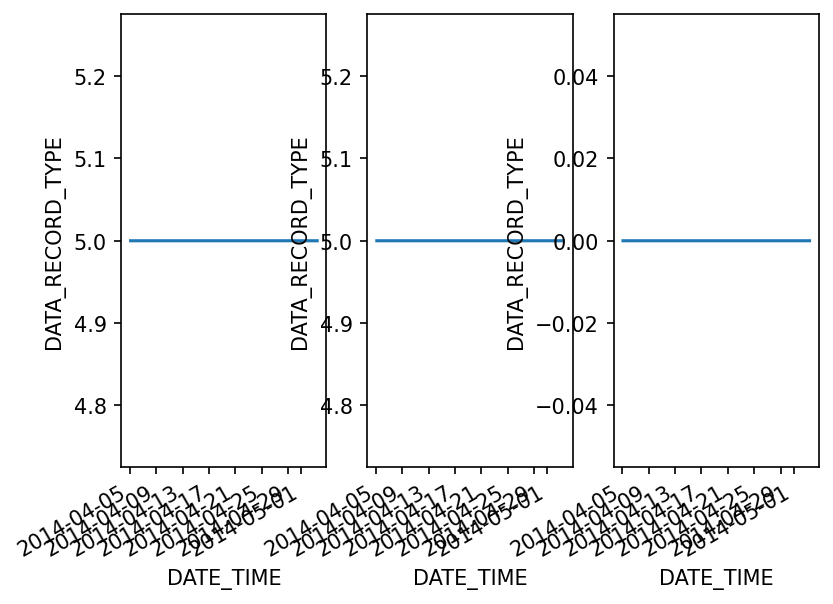

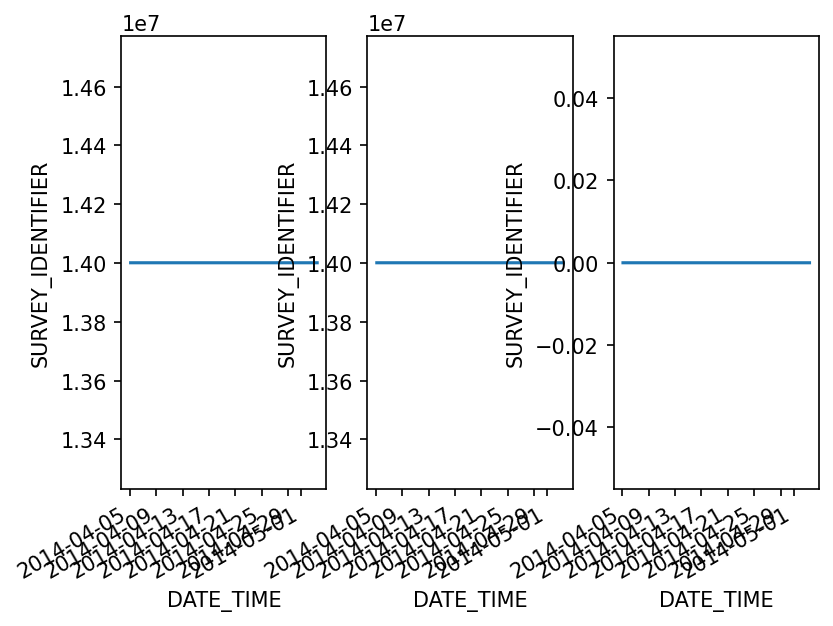

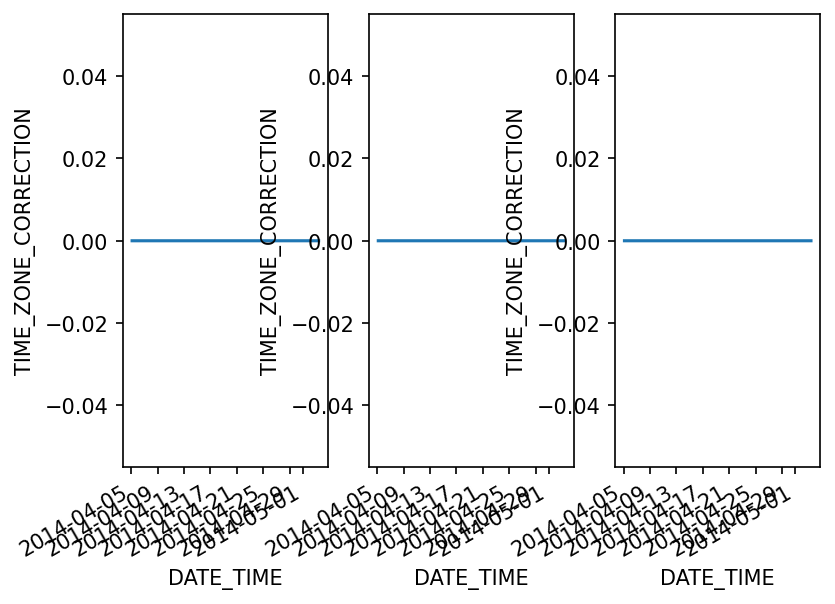

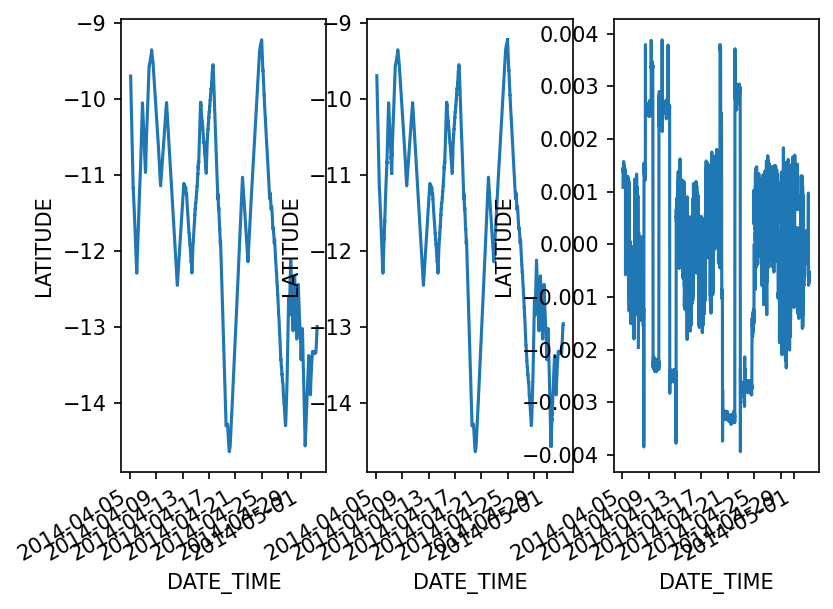

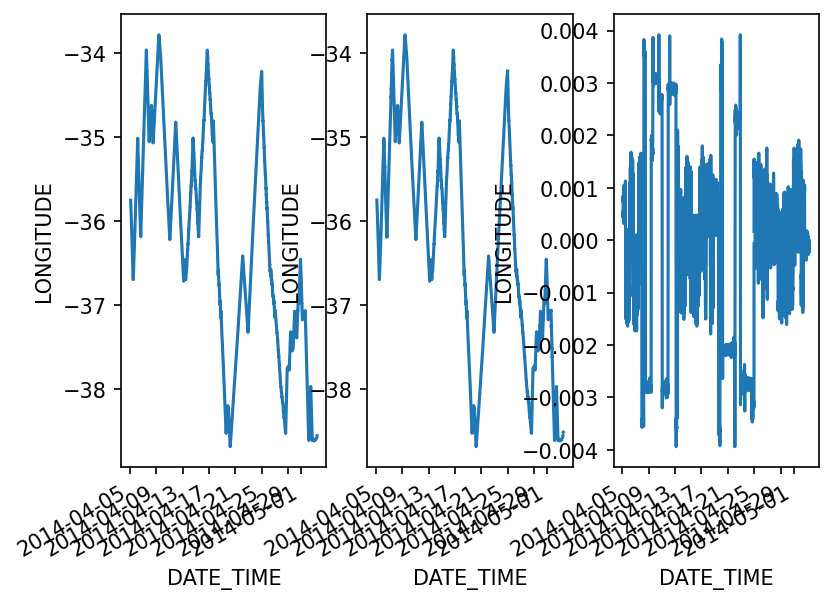

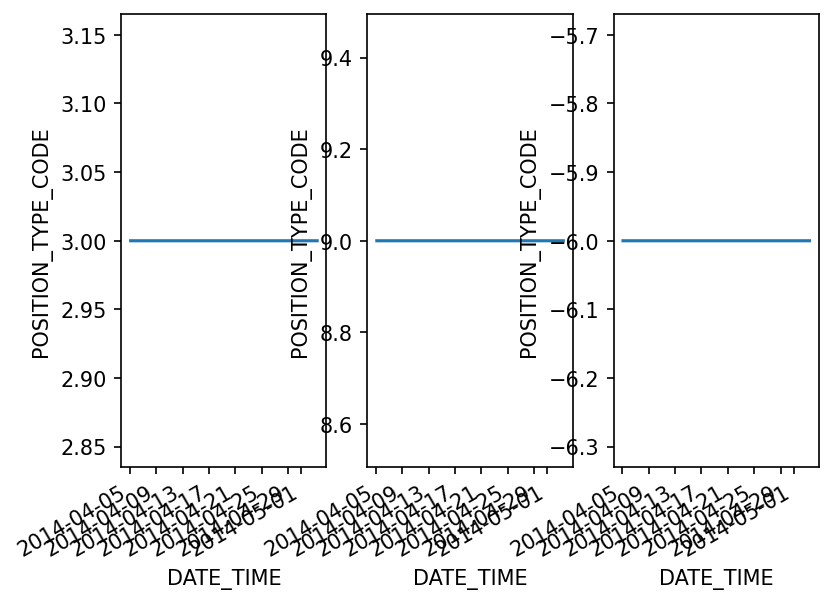

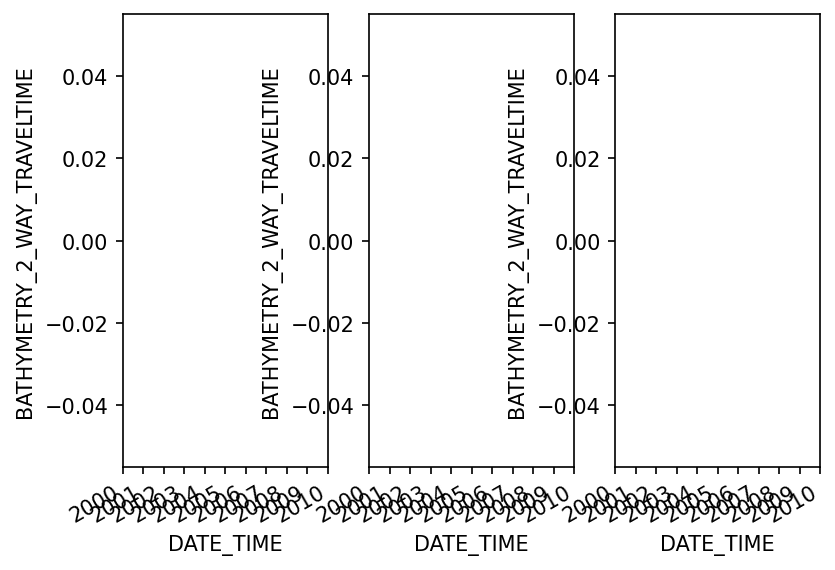

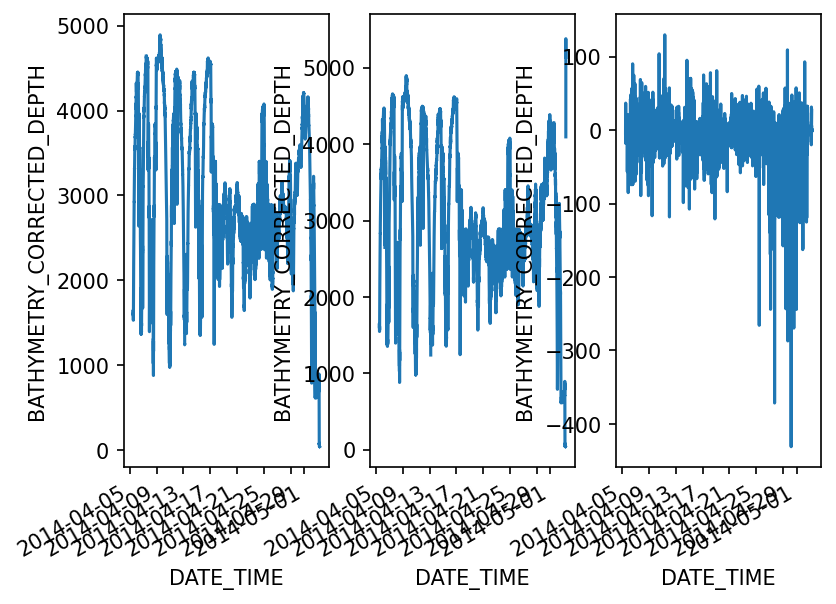

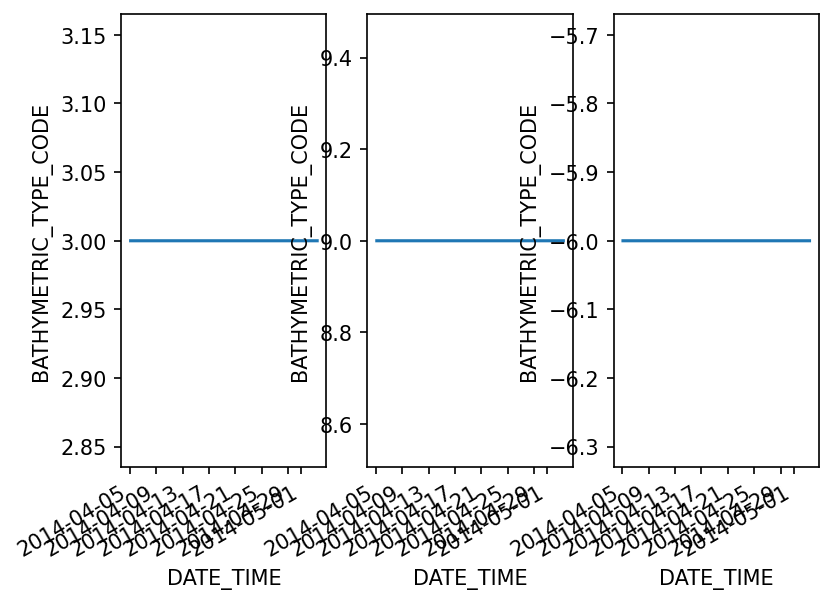

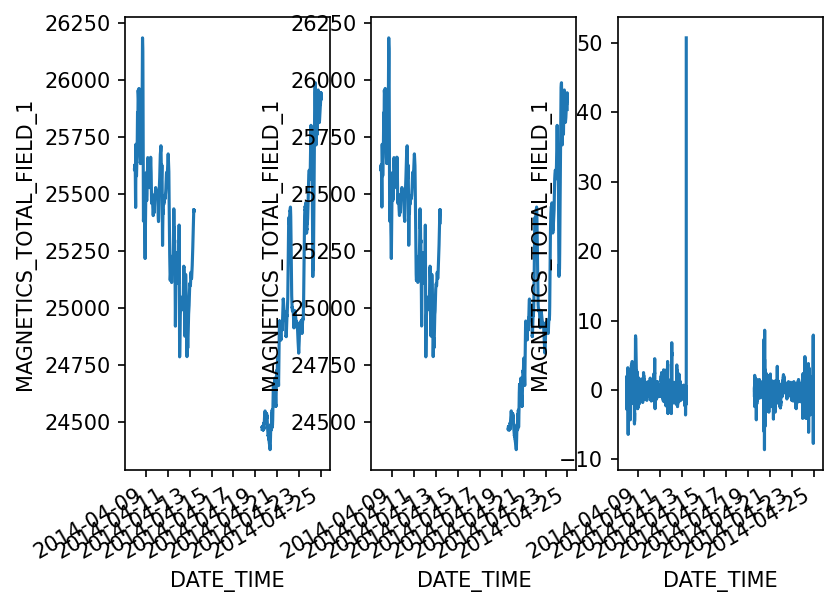

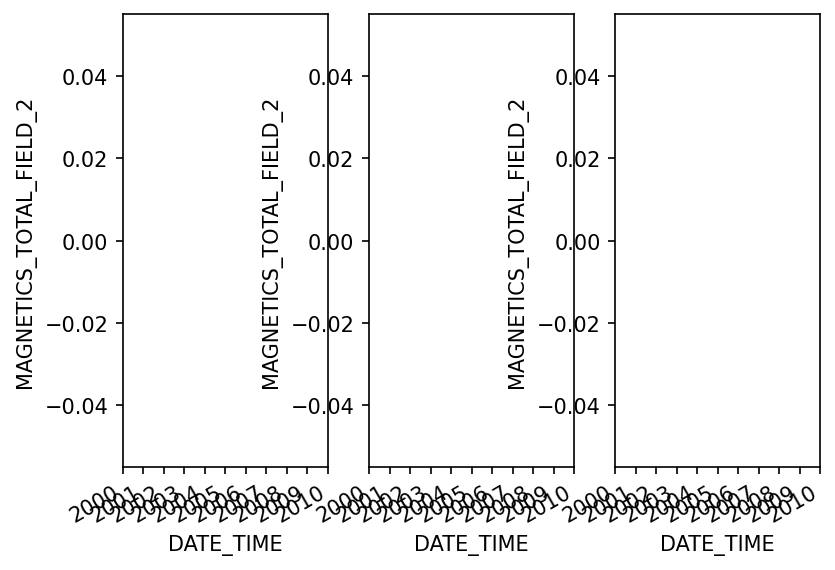

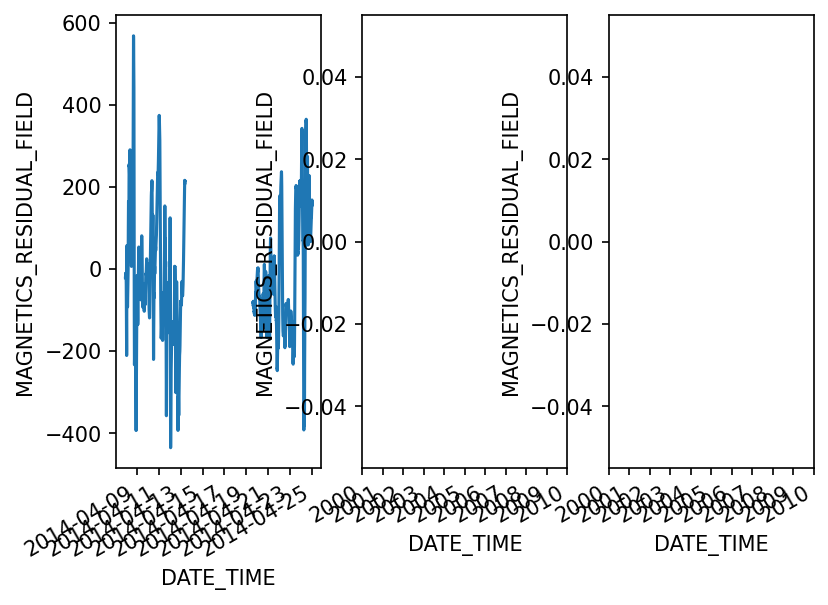

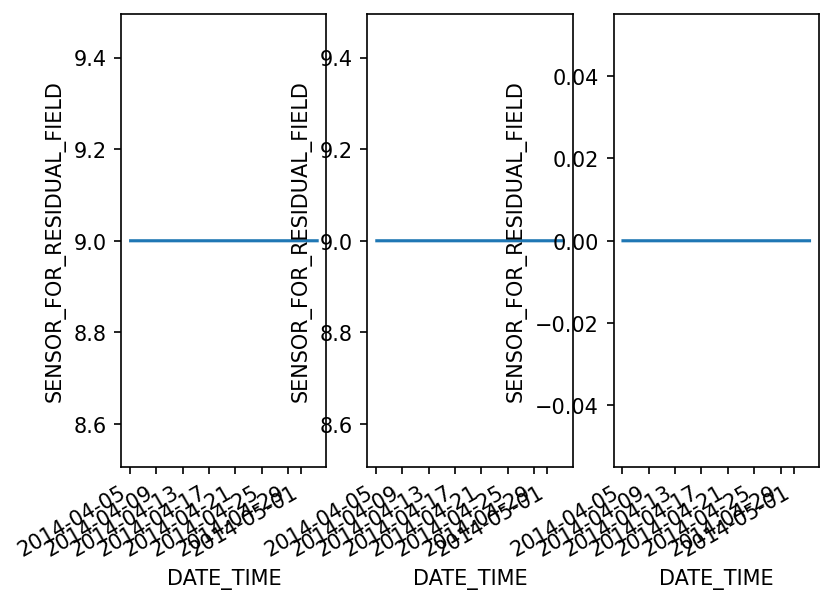

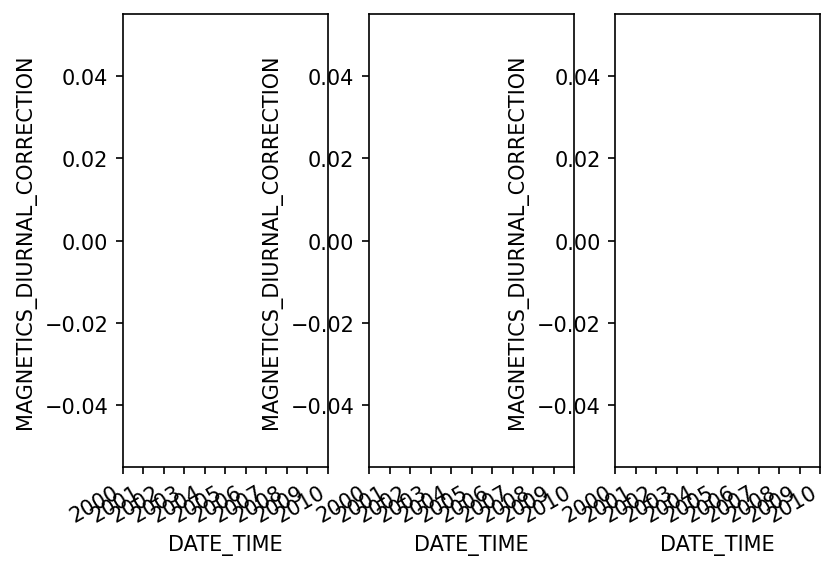

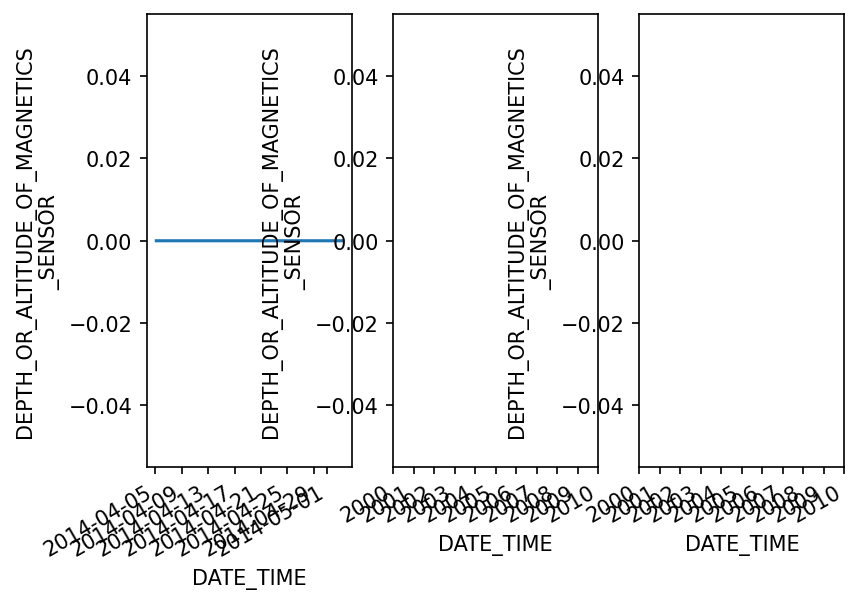

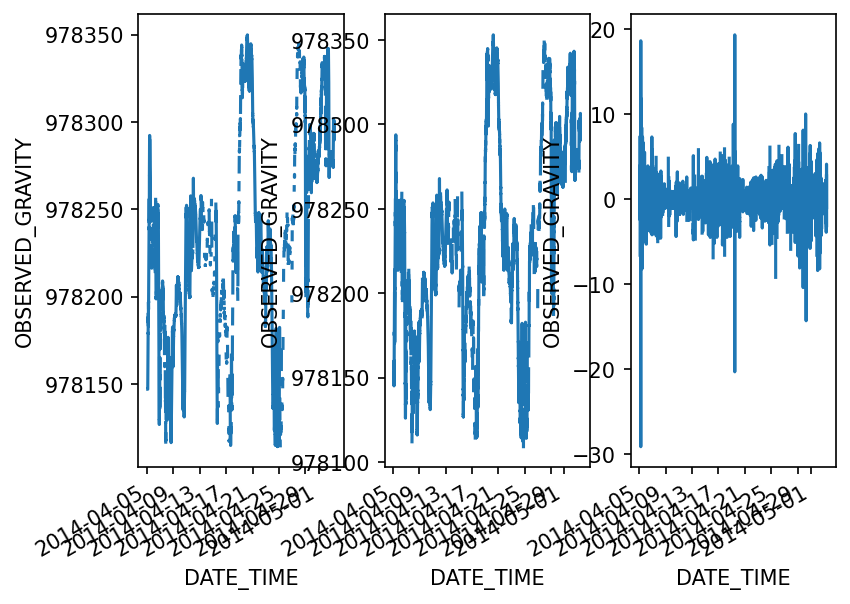

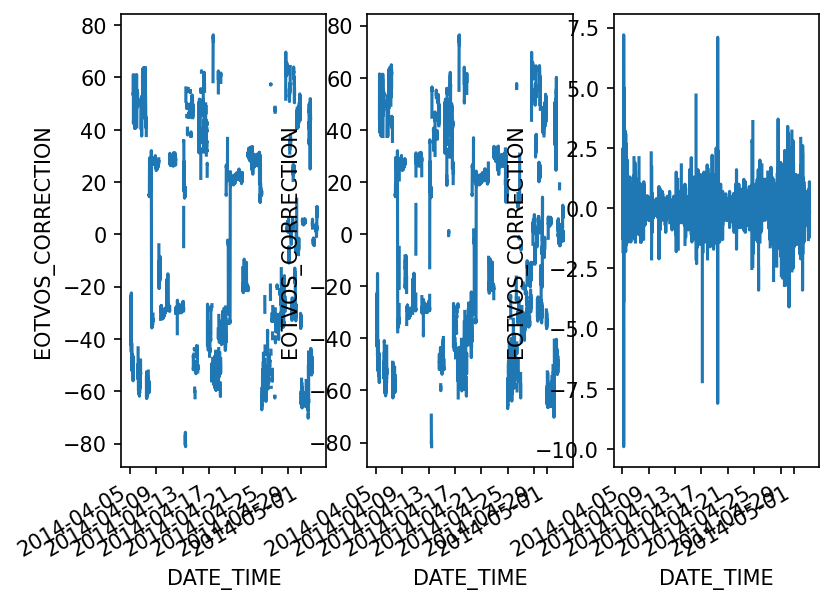

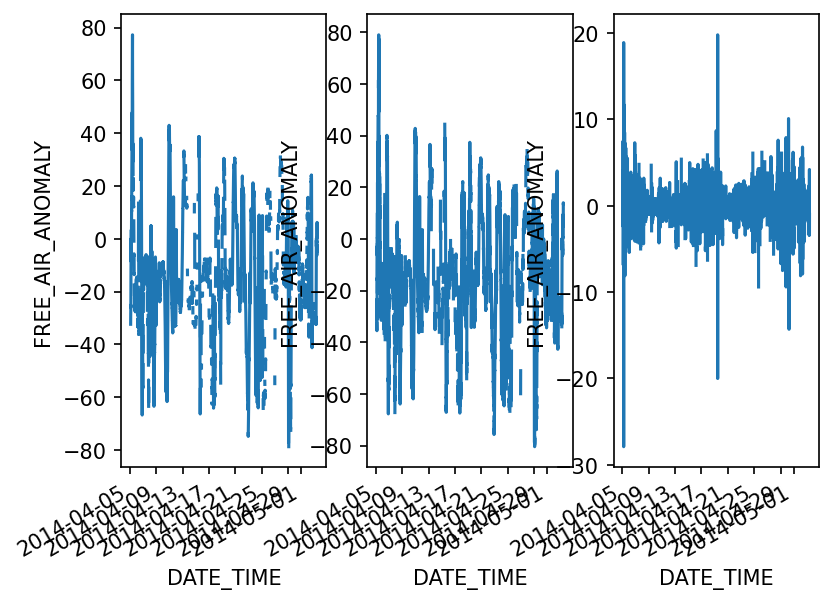

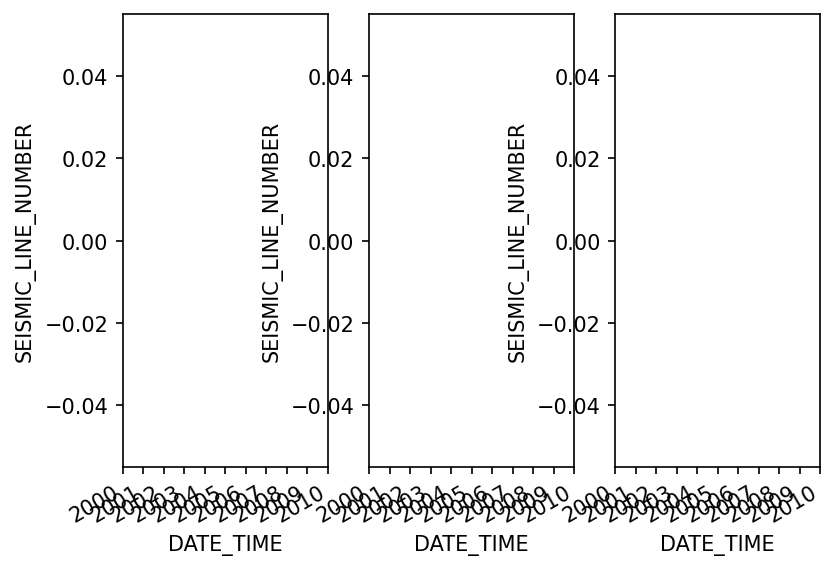

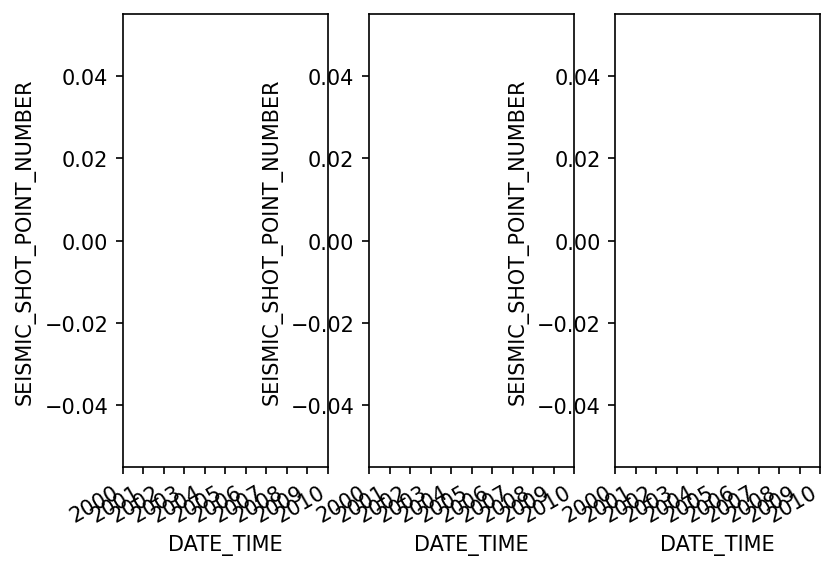

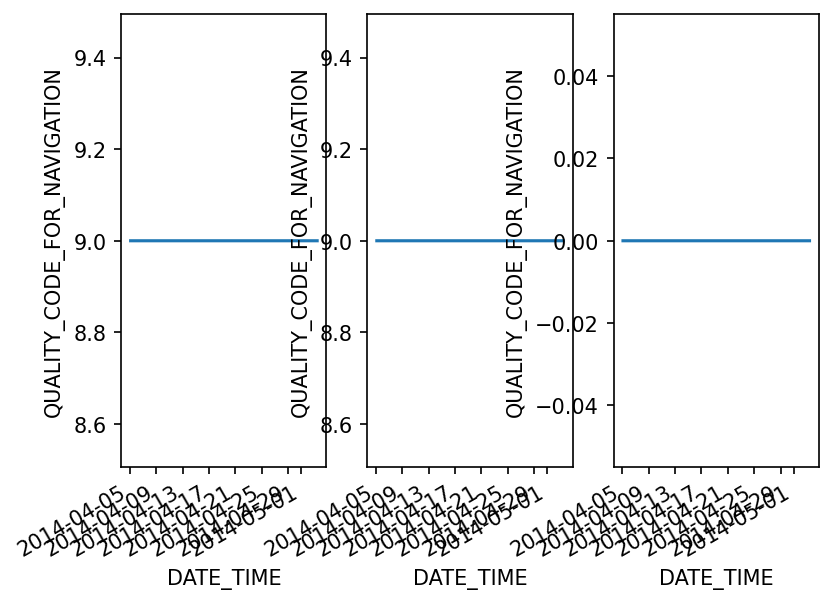

In [108]:
compare_mgd77(base_path + '201400080062.mgd77', base_path + 'test_2.mgd77')